# Tutorial 1 - Basic Operations on Images with OpenCV

This tutorial is part of the [CDA 4625 - Introduction to Mobile Robotics](http://users.cis.fiu.edu/~jabobadi/CDA4625/) and based on [OpenCV Resources](https://docs.opencv.org/4.x/d3/df2/tutorial_py_basic_ops.html).

# Learning Goals

* Access pixel values and modify them
* Access image properties
* Set a Region of Interest (ROI)

## Part 0 - Setting up your Drive

In [ ]:
import os 
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = 'drive/MyDrive/Colab Notebooks/Intro to Robotics/CoppeliaSim/OpenCV Tutorials'
# path = 'drive/MyDrive/...'
# path = 'drive/MyDrive/Intro to Robotics/OpenCV Tutorials'
os.chdir(path)
!ls

Mounted at /content/drive
 apple.png	   rio.jpg
 hysteresis.jpg    stereo_depth.jpg
 mario_apple.png   tsukuba_L.png
 mario.png	   tsukuba_R.png
 new_img.jpg	  'Tutorial OpenCV - Basic Operations on Images.ipynb'
 nms.jpg


## Part 1 - Some basic operations

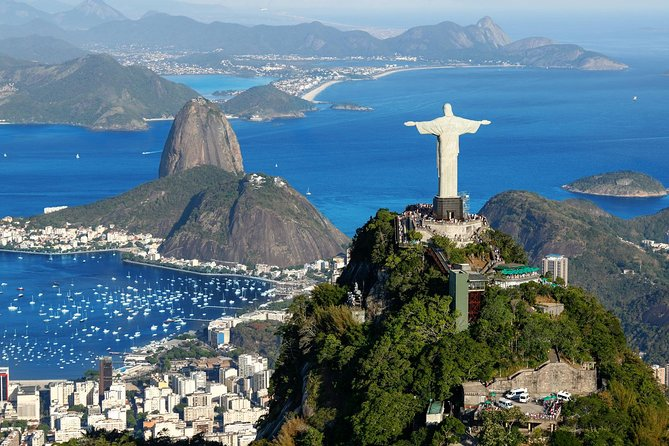

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

# load an image
# flag -1, 0, 1: loads a color image, grayscale, unchanged including alpha channel for transparency 
flag = -1
img = cv.imread('rio.jpg', flag)
# showing an image in Colab
cv2_imshow(img)

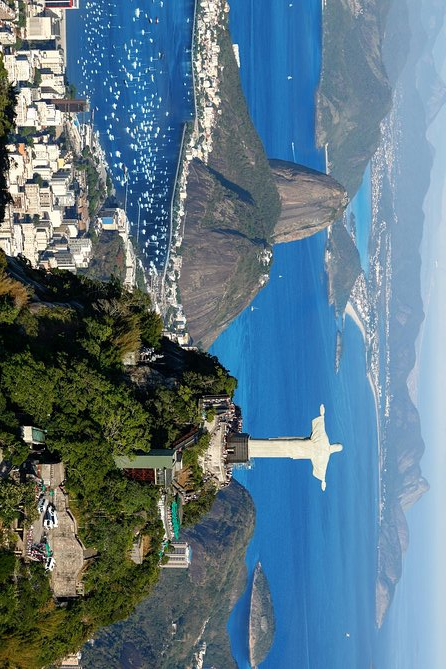

In [ ]:
# rotate image
# The function cv.rotate rotates the array in three different ways: ROTATE_90_COUNTERCLOCKWISE, ROTATE_90_CLOCKWISE, cv.ROTATE_180.
img1 = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)
cv2_imshow(img1)

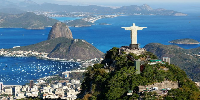

In [ ]:
# resize image 
# cv.resize(input, (dimension1_pixel_size, dimension2_pixel_size), fx, fx)
img2 = cv.resize(img, (200, 100))
cv2_imshow(img2)


One thing to keep in mind while using the cv2.resize() function is that the 
tuple passed for determining the size of the new image ((200, 100) in this case) follows the order (width, height) unlike as expected (height, width).


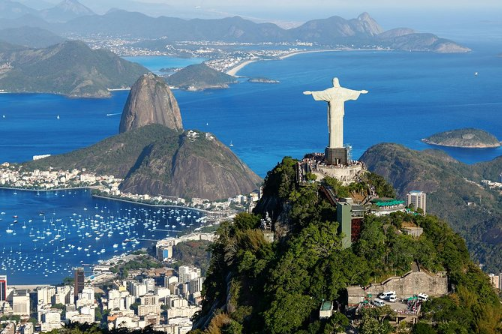

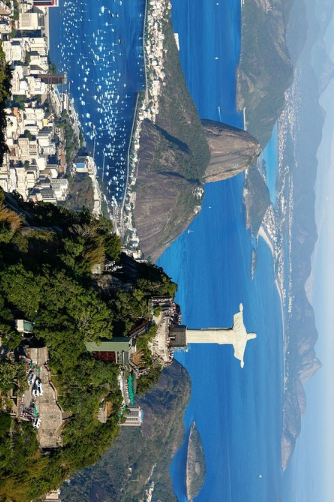

In [ ]:
# fx is the scaling factor along X-axis or Horizontal axis
# fy is the scaling factor along Y-axis or Vertical axis
resized_img = cv.resize(img, (0, 0), fx=0.75, fy=0.75)
cv2_imshow(resized_img)
cv2_imshow(cv.rotate(resized_img, cv.ROTATE_90_CLOCKWISE))

In [ ]:
# save a new image
cv.imwrite('new_img.jpg', resized_img)

True

## Part 2 - Playing with ROI (Region of Interest)

Example: For eye detection in images, first face detection is done over the entire image. When a face is obtained, we select the face region alone and search for eyes inside it instead of searching the whole image. It improves accuracy and performance because we search in a small area. ROI is again obtained using Numpy indexing. 

In [ ]:
'''
shape of an image = height, width, channels (color space of the picture, RGB normally. In OpenCV, BGR)
[
 
[[0,0,0], [255,255,255]], --------> 2x2 pixel, black and white image
[[0,0,0], [255,255,255]], 

]
'''
img = cv.imread('rio.jpg', 0)
print(img.shape)

(446, 669)


In [ ]:
# first row of the picture. (Keep in mind: color space of the picture In OpenCV is BGR)
print(img[0])

[175 174 173 173 174 175 176 178 179 178 177 175 174 177 182 187 185 186
 187 187 186 186 186 187 186 187 188 190 191 191 191 191 192 190 189 189
 189 187 184 181 186 186 186 186 186 186 186 186 184 184 184 185 185 186
 186 186 190 191 192 194 194 194 194 193 193 194 195 195 194 193 193 194
 192 193 193 193 193 193 193 193 189 192 192 188 186 183 177 170 182 189
 190 180 171 170 174 175 171 175 177 175 171 172 179 187 186 193 197 193
 187 188 192 194 194 193 191 191 192 192 191 190 192 192 192 192 192 192
 192 192 191 191 191 192 192 192 193 193 193 193 193 193 193 193 193 193
 193 193 193 193 193 193 193 193 193 193 193 193 193 193 193 193 193 193
 193 193 193 193 193 193 194 195 195 195 196 198 199 199 201 202 204 205
 206 206 205 204 206 206 206 206 206 205 203 203 206 206 206 206 206 206
 206 206 206 206 206 206 206 206 206 206 208 207 207 206 206 207 207 208
 209 209 209 208 207 206 204 204 203 204 206 208 208 208 207 206 206 206
 206 206 206 206 206 206 206 206 207 207 207 206 20

In [ ]:
# first row and first column of the picture. (Keep in mind: color space of the picture In OpenCV is BGR)
print(img[0][0])

175


In [ ]:
# first row, first column and first element of the pixel. (Keep in mind: color space of the picture In OpenCV is BGR)
print(img[0][0])

175


Selecting a ROI

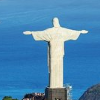

In [ ]:
import copy
img4 = copy.deepcopy(resized_img)
# height, width
statue = img4[60:160, 280:380]
cv2_imshow(statue)

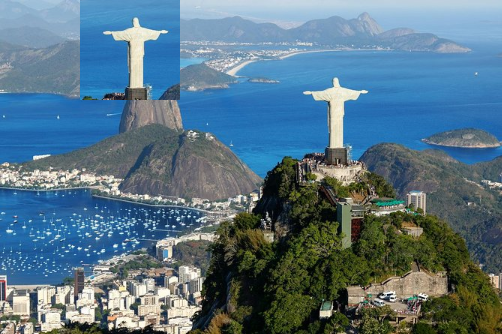

In [ ]:
img4 = copy.deepcopy(resized_img)
img4[0:100, 80:180] = statue
cv2_imshow(img4)

# Tutorial 2 - Image Filtering

As in one-dimensional signals, images also can be filtered with various low-pass filters (LPF) and high-pass filters (HPF). 

* LPF helps in removing noise, blurring images, etc. 
* HPF filters help in finding edges in images.

This tutorial is based on [OpenCV Resources](https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html).

# Learning Goals

* Blur images with various low pass filters
* Apply custom-made filters to images

## Part 1 - Image Blurring (Image Smoothing)

Image blurring is achieved by convolving the image with a low-pass filter kernel. 
* It is useful for removing noise. 
* It actually removes high frequency content (eg: noise, edges) from the image. So edges are blurred a little bit in this operation (there are also blurring techniques which don't blur the edges). 

* OpenCV provides four main types of blurring techniques.
  * Averaging
  * Gaussian Blurring
  * Median Blurring
  * Bilateral Filtering

## Averaging

This is done by convolving an image with a normalized box filter. 

* It simply takes the average of all the pixels under the kernel area and replaces the central element. 

* This is done by the function cv.blur() or cv.boxFilter(). 

* We should specify the width and height of the kernel. A 5x5 normalized box filter would look like the below:

$K = \dfrac{1}{25}\begin{bmatrix}
1 & 1 & 1 & 1 & 1  \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
\end{bmatrix}$

Original


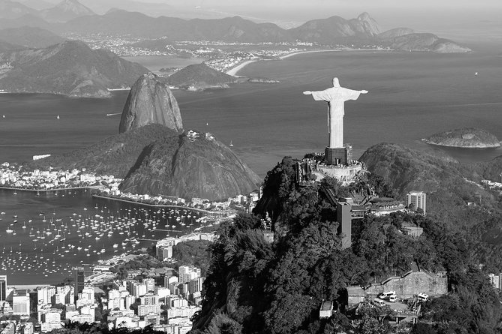

Blurred


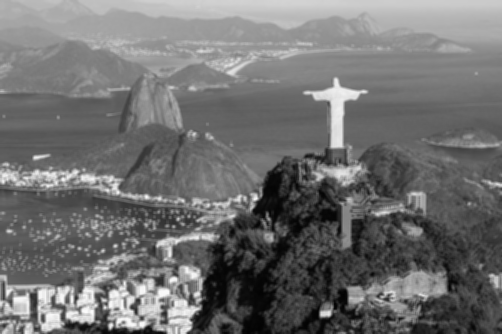

In [ ]:
# Image Smoothing with Averaging Technique
from google.colab.patches import cv2_imshow
resized_img_grayscale =  cv.cvtColor(resized_img, cv.COLOR_BGR2GRAY)
blur = cv.blur(resized_img_grayscale, (3,3))  # box size
print('Original')
cv2_imshow(resized_img_grayscale)
print('Blurred')
cv2_imshow(blur)

## Gaussian Blurring
* In this method, instead of a box filter, a Gaussian kernel is used. 
* It is done with the function, cv.GaussianBlur(). 
* We should specify the width and height of the kernel which should be positive and odd. 
* We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as the same as sigmaX. If both are given as zeros, they are calculated from the kernel size. 
* Gaussian blurring is highly effective in removing Gaussian noise from an image.

Original


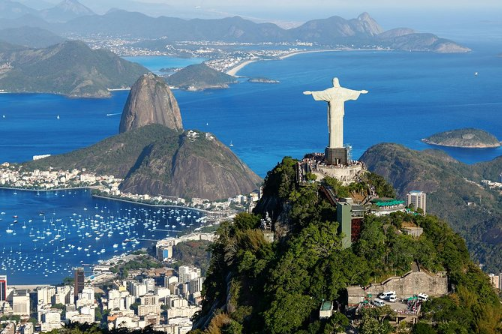

Blurred


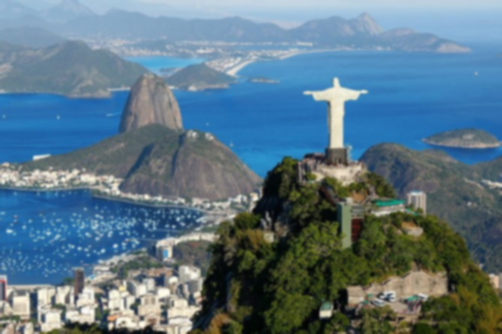

In [ ]:
# Image Smoothing with Gaussian Technique
from google.colab.patches import cv2_imshow
img = copy.deepcopy(resized_img)
blur = cv.GaussianBlur(img, (5,5), 0)  
print('Original')
cv2_imshow(img)
print('Blurred')
cv2_imshow(blur)

# Tutorial 3 - 3D Reconstruction (Depth Map from Stereo Images)

* If we have two images of same scene, we can get depth information from that in an intuitive way.


* The diagram below contains equivalent triangles. Writing their equivalent equations will yield us following result:

\begin{equation}
disparity = x - x' = \dfrac{Bf}{Z}
\end{equation}

* $x$  and $x′$ are the distance between points in image plane corresponding to the scene point 3D and their camera center. 
* $B$ is the distance between two cameras (which we know) 
* $f$ is the focal length of camera (already known). 

* The depth of a point in a scene is inversely proportional to the difference in distance of corresponding image points and their camera centers. 

* With this information, we can derive the depth of all pixels in an image.


![image.png](https://drive.google.com/uc?export=view&id=1gCAMp0Pb7bGeV4jAc73z-L0j0-cfxQyY)

Original Left


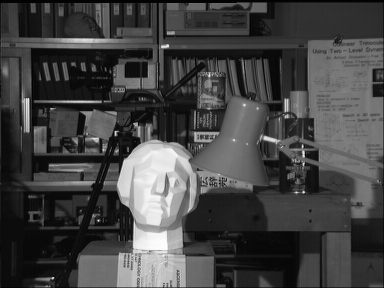

Original Right


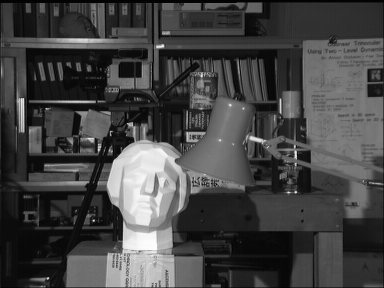

Disparity Map


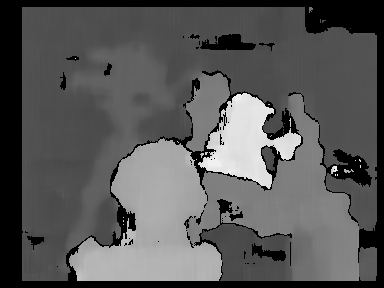

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
imgL = cv.imread('tsukuba_L.png',0)
imgR = cv.imread('tsukuba_R.png',0)
stereo = cv.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgL,imgR)
print('Original Left')
cv2_imshow(imgL)
print('Original Right')
cv2_imshow(imgR)
print('Disparity Map')
cv2_imshow(disparity)

For more details about StereoBM Algorithm, please check [here](https://docs.opencv.org/3.4/dd/d53/tutorial_py_depthmap.html).

There are some parameters when you get familiar with StereoBM, and you may need to fine tune the parameters to get better and smooth results. 

* **texture_threshold**: filters out areas that don't have enough texture for reliable matching
* **Speckle range and size**: Block-based matchers often produce "speckles" near the boundaries of objects, where the matching window catches the foreground on one side and the background on the other. In this scene it appears that the matcher is also finding small spurious matches in the projected texture on the table. To get rid of these artifacts we post-process the disparity image with a speckle filter controlled by the speckle_size and speckle_range parameters. speckle_size is the number of pixels below which a disparity blob is dismissed as "speckle." speckle_range controls how close in value disparities must be to be considered part of the same blob.

* **Number of disparities**: How many pixels to slide the window over. The larger it is, the larger the range of visible depths, but more computation is required.

* **min_disparity**: the offset from the x-position of the left pixel at which to begin searching.

* **uniqueness_ratio**: Another post-filtering step. If the best matching disparity is not sufficiently better than every other disparity in the search range, the pixel is filtered out. You can try tweaking this if texture_threshold and the speckle filtering are still letting through spurious matches.

* **prefilter_size and prefilter_cap**: The pre-filtering phase, which normalizes image brightness and enhances texture in preparation for block matching. Normally you should not need to adjust these.

# Tutorial 4 - Canny Edge Detection


* It is a multi-stage algorithm and we will go through each stages.
Noise Reduction

* **Noise Reduction**: 
  * Since edge detection is susceptible to noise in the image, first step is to remove the noise in the image with a 5x5 Gaussian filter. 



* **Finding Intensity Gradient of the Image**: 

  * Smoothened image is then filtered with a Sobel kernel in both horizontal and vertical direction to get first derivative in horizontal direction ($G_x$) and vertical direction ($G_y$). 
  
  * From these two images, we can find edge gradient and direction for each pixel as follows:

  \begin{equation}
\text{edge gradient } G = \sqrt{G_x^2 + G_y^2}
  \end{equation}

    \begin{equation}
\text{angle } \theta = \tan^{-1} \Bigg(\dfrac{G_y}{G_x}\Bigg)
  \end{equation}


  * Gradient direction is always perpendicular to edges. It is rounded to one of four angles representing vertical, horizontal and two diagonal directions






* **Non-maximum Suppression**

  * After getting gradient magnitude and direction, a full scan of image is done to remove any unwanted pixels which may not constitute the edge. 
  * Every pixel is checked whether it is a local maximum in its neighborhood in the direction of gradient

  ![nms.jpg](https://drive.google.com/uc?export=view&id=1KAGaUeVUHfhYwuCTUsWj2uzpP5KAFBQR)


* Point A is on the edge (in vertical direction). Gradient direction is normal to the edge. Point B and C are in gradient directions. So point A is checked with point B and C to see if it forms a local maximum. If so, it is considered for next stage, otherwise, it is suppressed ( put to zero).

* In short, the result you get is a binary image with "thin edges".

* **Hysteresis Thresholding**

  * This stage decides which are all edges are really edges and which are not.  
  * For this, we need two threshold values, `minVal` and `maxVal`. 
  * Any edges with intensity gradient more than `maxVal` are sure to be edges and those below `minVal` are sure to be non-edges, so discarded.

  ![hysteresis.jpg](https://drive.google.com/uc?export=view&id=1PiodKxk-kUZro4IQHQtlf0sjw5834RmM)

The edge A is above the` maxVal`, so considered as "sure-edge". Although edge C is below `maxVal`, it is connected to edge A, so that also considered as valid edge and we get that full curve. But edge B, although it is above `minVal` and is in same region as that of edge C, it is not connected to any "sure-edge", so that is discarded. So it is very important that we have to select `minVal` and `maxVal` accordingly to get the correct result.


For more details about Canny Edge Detection Algorithm, please check [here](https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html).

Original


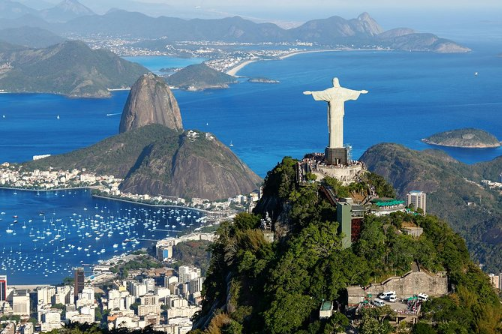

Edge Image


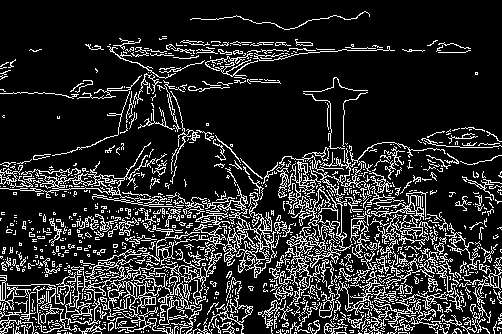

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
img = copy.deepcopy(resized_img)
# Arg 1: input image. 
# Arg 2 and 3: minVal and maxVal, respectively. 
# Arg 4: Kernel option used for find image gradients.
# Last arg: specifies the equation for finding gradient magnitude.
edges = cv.Canny(img,100,200)
print('Original')
cv2_imshow(img)
print('Edge Image')
cv2_imshow(edges)

# Tutorial 5 - Template Matching

For more details about Template Matching, please check [here](https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html).

* Template Matching is a method for searching and finding the location of a template image in a larger image. 

* OpenCV comes with a function cv.matchTemplate() for this purpose. 

* It simply slides the template image over the input image (as in 2D convolution) and compares the template and patch of input image under the template image. 

* Several comparison methods are implemented in OpenCV. (You can check [docs](https://docs.opencv.org/4.x/df/dfb/group__imgproc__object.html#ga586ebfb0a7fb604b35a23d85391329be) for more details). 

* It returns a grayscale image, where each pixel denotes how much does the neighbourhood of that pixel match with template.

* If input image is of size (WxH) and template image is of size (wxh), output image will have a size of (W-w+1, H-h+1). 

Original Image


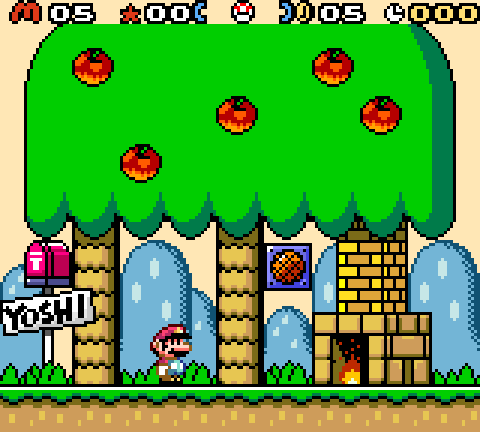

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
# Import image.png
img_rgb = cv.imread('mario.png')
# Show imported image
print('Original Image')
cv2_imshow(img_rgb)

Grayscale Image


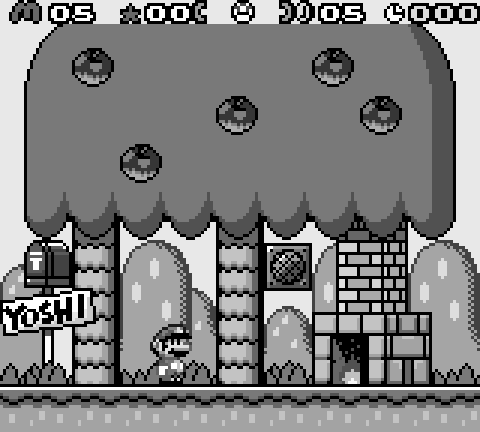

In [ ]:
# Change image to gray scale
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
print('Grayscale Image')
cv2_imshow(img_gray)

Template


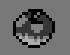

In [ ]:
# Import the template (feature) we want to match
template = cv.imread('apple.png',0)
print('Template')
cv2_imshow(template)

Template Match


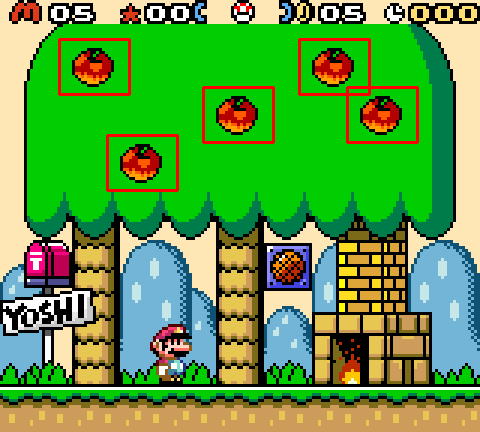

In [ ]:
# Get the shape of the template
w, h = template.shape[::-1]

# Match template with gray scale, original image using CCOEFF NORMED method
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.9

# numpy.where() function returns the indices of elements in an input array where the given condition is satisfied.
loc = np.where( res >= threshold)

# Draw rectangle around template
# *loc[::-1] = the * unpacks the indices and elements
# The zip() function returns an iterator of tuples based on the iterable objects.
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
cv.imwrite('mario_apple.png',img_rgb)
new_img = cv.imread('mario_apple.png')
print('Template Match')
cv2_imshow(new_img)

cv.rectangle(img)

* **img**: The image where you want to draw the shapes
* **color**: Color of the shape. for BGR, pass it as a tuple, eg: (255,0,0) for blue. For grayscale, just pass the scalar value.
* **thickness**: Thickness of the line or circle etc. If -1 is passed for closed figures like circles, it will fill the shape. Default **thickness** = 1



# Hough Circle Transform

* A circle is represented mathematically as $(x− x_{center})^2 + (y −y_{center})^2=r^2$ 
* $(x_{center},y_{center})$ is the center of the circle
* $r$ is the radius of the circle. 

* From equation above, we can see we have 3 parameters, so we need a 3D accumulator for hough transform. This would be highly ineffective. 

* OpenCV uses Hough Gradient Method, which provides the gradient information of edges.

In [ ]:
import numpy as np
import cv2 as cv

img = cv.imread('mario.png',0)
img = cv.GaussianBlur(img,(5,5), 0)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=100,param2=30,minRadius=0,maxRadius=30)

# np.around = For values exactly halfway between rounded decimal values, NumPy rounds to the nearest even value. (e.g. 1.5 and 2.5 round to 2.0)
circles = np.around(circles)
# x_center, y_center, radius
print(circles)

[[[ 92.  66.  18.]
  [140. 162.  18.]
  [236. 114.  18.]
  [332.  66.  18.]
  [380. 114.  18.]
  [ 30. 320.  13.]
  [282. 270.  12.]
  [ 60.  12.  10.]
  [330.  12.  10.]
  [396.  12.   8.]]]


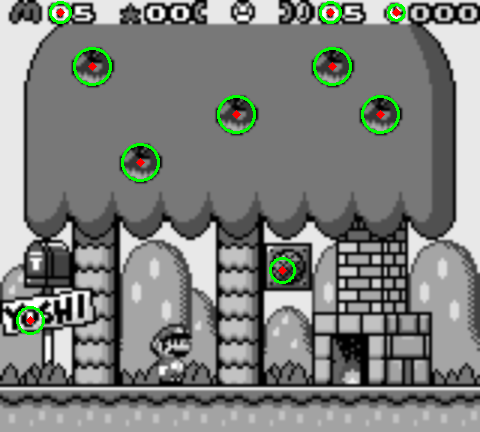

In [ ]:
for i in circles[0,:]:
    # draw the outer circle (parameters: image, center_coordinates, radius, color, thickness)
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
cv2_imshow(cimg)

cv.HoughCircles(img, method, dp, minDist, param1, param2, minRadius, maxRadius)
* img = 8-bit, single-channel, grayscale input image
* method = Detection method, see HoughModes. The available methods are HOUGH_GRADIENT and HOUGH_GRADIENT_ALT
* dp =	Inverse ratio of the accumulator resolution to the image resolution. 
* minDist	Minimum distance between the centers of the detected circles. If the parameter is too small, multiple neighbor circles may be falsely detected in addition to a true one. If it is too large, some circles may be missed.
* param1	First method-specific parameter. In case of HOUGH_GRADIENT and HOUGH_GRADIENT_ALT, it is the higher threshold of the two passed to the Canny edge detector (the lower one is twice smaller). 

* param2:	Second method-specific parameter. In case of HOUGH_GRADIENT, it is the accumulator threshold for the circle centers at the detection stage. The smaller it is, the more false circles may be detected. Circles, corresponding to the larger accumulator values, will be returned first. 

* minRadius: 	Minimum circle radius.
* maxRadius	Maximum circle radius. 